Import

In [1]:
import os
import numpy as np
import csv
import numpy as np
import pandas as pd
import plotly.offline as plt
import plotly.graph_objs as go
import matplotlib.pyplot as mtp

Read the Data

In [2]:
data = pd.read_csv(r"Data_Points.csv")
print(data)

      Limitied_CPU  Limited_Mem  Auto Scalabilty  Multi Host  Rolling Update  \
0                6            4                5           0               2   
1                6            4                5           0               2   
2                6            4                5           0               3   
3                6            4                5           0               3   
4                6            4                5           0               1   
...            ...          ...              ...         ...             ...   
5035             0            2                1           3               6   
5036             0            2                1           3               5   
5037             0            2                1           3               5   
5038             0            2                1           3               4   
5039             0            2                1           3               4   

      Load Balancing  Delay Requirement

Sample of data

In [3]:
x= data.iloc[:, 0:7].values  
y= data.iloc[:, 7:8].values 
print(x.shape)
print(y.shape)
print(x)
print(y)

(5040, 7)
(5040, 1)
[[6 4 5 ... 2 1 3]
 [6 4 5 ... 2 3 1]
 [6 4 5 ... 3 1 2]
 ...
 [0 2 1 ... 5 6 4]
 [0 2 1 ... 4 5 6]
 [0 2 1 ... 4 6 5]]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [4]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [5]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [8]:
from sklearn import svm
clf = svm.SVC(probability = True)
clf.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(probability=True)

In [9]:
#Predicting the test set result  
y_pred= clf.predict(x_test)
temp1 = clf.predict_proba(x_test)
print(y_pred)
print(temp1[:,1])
print(np.unique(temp1[:,1]))

[1 0 1 ... 1 0 1]
[9.99997835e-01 1.00000010e-07 1.00000000e+00 ... 1.00000000e+00
 1.00000010e-07 7.80098495e-01]
[1.00000010e-07 1.01027010e-07 1.52931642e-07 1.58966588e-07
 1.86468609e-07 1.94631322e-07 1.99331573e-07 2.15080210e-07
 2.66436734e-07 2.71457238e-07 2.83968341e-07 3.30082352e-07
 3.37723783e-07 3.61189654e-07 3.67545114e-07 3.74911735e-07
 3.79050210e-07 3.89376521e-07 4.12797291e-07 4.26660013e-07
 4.49970988e-07 4.67211342e-07 5.10985093e-07 5.72647441e-07
 5.78034332e-07 5.78317105e-07 5.86229618e-07 6.73229496e-07
 7.34301241e-07 7.37346136e-07 8.52827042e-07 8.65367544e-07
 9.21863552e-07 9.71758332e-07 9.91618392e-07 1.00767381e-06
 1.02427633e-06 1.06308730e-06 1.14329637e-06 1.19918344e-06
 1.21184677e-06 1.29925657e-06 1.42216411e-06 1.53192304e-06
 2.29024412e-06 2.32267217e-06 2.35601475e-06 2.54737811e-06
 2.74665849e-06 2.81394409e-06 2.86575741e-06 2.95367858e-06
 3.10231866e-06 3.22757058e-06 4.29959082e-06 4.52484715e-06
 4.74546941e-06 5.70325366e-06 

In [10]:
clf.score(x_test, y_test)

0.9952380952380953

In [11]:
from sklearn.model_selection import cross_val_score
#train model with cv of 5 
cv_scores = cross_val_score(clf, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: Dat

[0.82043651 0.99107143 0.98710317 1.         0.94146825]
cv_scores mean:0.9480158730158731


In [12]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

average_precision = average_precision_score(y_test, temp1[:,1])

print('Average precision score: {0:0.2f}'.format(average_precision))


precision_val = precision_score(y_test, y_pred, average="binary")
print("Precision:",precision_val)

recall_val = recall_score(y_test, y_pred, average="binary")
print("Recall:",recall_val)

Average precision score: 1.00
Precision: 0.9884836852207294
Recall: 1.0


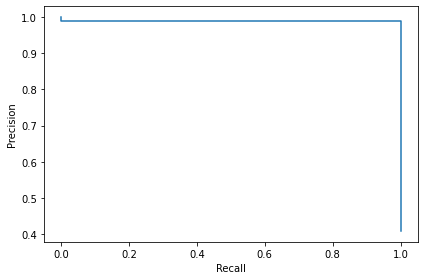

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred)

disp = PrecisionRecallDisplay(precision, recall)
disp.plot()

plt.tight_layout()
plt.savefig('Logistic_P_P-R.eps', format='eps')

In [18]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print(cm)  

[[739   6]
 [  0 515]]


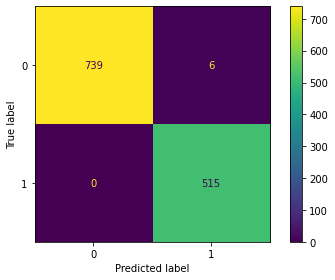

In [20]:
import matplotlib.pyplot as plt 
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.tight_layout()
plt.savefig('Logistic_P_CM.eps', format='eps')